In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'd:\\git_local_repository\\yangoos57\\ML\\Hands_On_Data_preprocessing_in_python\\Part3'

In [95]:
# speech list를 한 줄로만 로드했다.
speech_list = os.listdir('./data/ch10/Speeches')
# 일단 파일을 하나씩 불러와서 한줄만 추출하는 리스트를 만들자.
content = []
for title in speech_list :
    f = open(f'./data/ch10/Speeches/{title}','r', encoding='utf-8')
    f_content = f.readlines()
    f.close()
    content.append(f_content[0])


### dataframe은 list를 합칠 때 아래로 합치는게 아니라 옆으로 합친다. 그러다보니 column 단위로 묶인 list를 dataframe으로 만들기 위해서는 추가적인 절차가 필요하다. 

# 첫번째 방법 : 행열을 바꾸는 방법이다. 간단하고 직관적이다.
speech_total = pd.DataFrame([speech_list,content]).T
speech_total.head(1)

# 두번째 방법 : 리스트를 zip() 매소드를 이용해 묶는 방법이다. 새로운 방법을 배운다는데 의의가 있다.
speech_total = pd.DataFrame(list(zip(speech_list,content)), columns=['title','contents'])
speech_total.head(1)

,title,contents
0,BattleCreekDec19_2019.txt,Thank you. Thank you. Thank you to Vice Presid...


### Apply 함수 적용하기
Apply 매소드는 dataframe에 있는 row를 하나씩 불러와 원하는 함수에 반영하여 결과값을  얻은 뒤 다시 저장하는 매소드로 파이썬의 map과 동일한 기능을 수행합니다. 

column 이나 Dataframe 전체에도 적용 가능합니다.

Apply함수는 아래 절차를 간단하게 만들어줍니다.
 
1. 적용할 대상을 하나씩 불러오는 loop를 만들고 
2. 불러온 값을 함수에 적용하고 
3. 적용된 결과를 하나의 list로 모은 뒤
4. 해당 리스트를 다시 colum으로 만든 다음 반영하고
5. 기존의 column을 지운다.

Apply() 하나면 다섯번의 절차를 한번으로 쉽게 줄여줄 수 있습니다.

In [96]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'
,'Oct','Sep','Nov','Dec']

def city_extraction(v) :
    for mon in Months :
        if mon in v :
            return v[:v.find(mon)]
            
speech_total['city'] = speech_total.title.apply(city_extraction)



### pandas로 Datetime 건드리기
데이터 분석을 할 때 시계열 자료를 다루는 일은 매우 흔하다. Dataframe은 날짜 및 시간을 다루기 위한 매소드가 풍부하게 많다. 

우리가 시계열을 다뤄야할 일이 많으므로 이와 관련한 메소드를 배워두는 건 큰 도움이 된다.

[이 사이트](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)는 파이썬 공식 사이트인데 시계열과 관련된 fortmat을 설명하는 페이지이다.

여기서 설명하는 format은 파이썬에만 통용되는 것이 아니라 모든 프로그래밍 언어에서 활용된다. 나중에 다른 프로그래밍 언어에서도 시계열 데이터를 다룰 때 도움되니 자주 보고 익혀두자.


In [97]:
def date_extraction(r) :
    return r.title[len(r.city):r.title.find('.txt')]

speech_total['date'] = speech_total.apply(date_extraction, axis=1)

# format은 현재 데이터 양식이 어떤 패턴인지를 pandas에게 설명하는 kwargs이다.
speech_total.date = pd.to_datetime(speech_total.date, format = '%b%d_%Y')

In [98]:
def extractDMY(r) :
    r['day'] = r.date.day
    r['month'] = r.date.month
    r['year'] = r.date.year
    return r

# apply를 dataframe에 적용하는 방법과 iterrow로 dataframe에 적용하는 방법은 결과가 동일하다.
speech_total = speech_total.apply(extractDMY, axis = 1 )
speech_total.drop(columns=['title'], inplace=True)

In [99]:
words = ['vote','tax','campaign','economy']

def findwordratio(row) :
    total_n_words = len(row.contents.split(' '))
    for w in words :
        row['r_{}'.format(w)] = row.contents.count(w)/total_n_words
    return row
### apply는 row를 하나씩 불러와서 적용하는 방법이다. 
speech_total = speech_total.apply(findwordratio,axis=1)
speech_total.head(1)

,contents,city,date,day,month,year,r_vote,r_tax,r_campaign,r_economy
0,Thank you. Thank you. Thank you to Vice Presid...,BattleCreek,2019-12-19,19,12,2019,0.000561,0.000505,0.000224,0.000617


In [100]:
Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'
,'Oct','Sep','Nov','Dec']

lambda_func = lambda r: '{}_{}'.format(r.year,Months[r.month-1])
speech_total['Y_M'] = speech_total.apply(lambda_func, axis=1) 

### .pivot_table(index = 불러올 column, values = 불러올 column, aggfunc = 구현하고자 하는 기능)
* pivot table을 활용하면 index와 column을 맘대로 설정할 수 있다는 장점이 있음!
* aggfuction은 groupby 뒤에 붙는 mean(), size()와 같은 기능을 수행함.


In [101]:
Words = ['vote','tax','campaign','economy']

vis_df = speech_total.pivot_table( index =['Y_M'], values=['r_{}'.format(w) for w in words], aggfunc=np.mean)

vis_df

,r_campaign,r_economy,r_tax,r_vote
Y_M,,,,
2019_Aug,0.001499,0.000270,0.000872,0.001596
2019_Dec,0.000316,0.000665,0.000558,0.000739
2019_Jul,0.000283,0.000660,0.000660,0.001603
2019_Nov,0.000551,0.000333,0.000385,0.002048
2019_Oct,0.000533,0.000572,0.001340,0.001398
2019_Sep,0.000843,0.000448,0.000419,0.000409
2020_Aug,0.000428,0.000222,0.001189,0.001577
2020_Feb,0.000353,0.000224,0.000625,0.001206
2020_Jan,0.000299,0.000240,0.001331,0.001215


### Groupby는 column의 class별로 데이터를 종합함. 여담이지만 Row가 많더라도 class가 적으면 그만큼 row size도 작다.

* groupby와 pivot 기능은 둘 다 같은 instance를 하나로 묶는다는 점에서 유사하다. groupby와 pivot_table은 모두 class 별로 종합(aggregate)한다. 

* Groupby 결과값은 multi-index를 반영한 series로 pivot_table은 행열이 갖춰진 dataframe으로 반환된다는 차이가 있다.

### 보여주고자 하는 방법이 복잡하면 그만큼 구현하기 까다롭다.
원하는 차트를 그리기 위해서는 무엇을 그리고 싶은지, 그리고 어떻게 그려야하는지 알아야한다. 응용이야 필요하지만 기본적으로 구현하고자 하는 기능을 만드는 방법을 외워야한다.

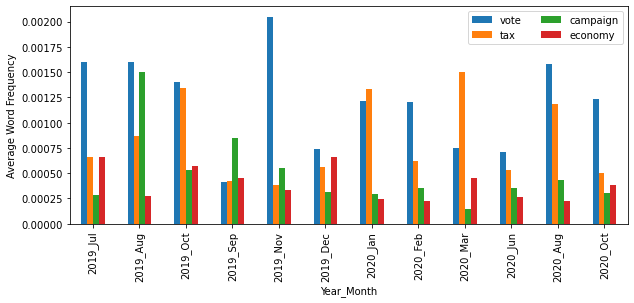

In [103]:
column_order = vis_df.sum().sort_values(ascending=False).index
row_order = speech_total.sort_values('date').Y_M.unique()

 # pandas에서는 plot함수로 차트를 그릴 수 있다.
vis_df[column_order].loc[row_order].plot.bar(figsize=(10,4))

# legend를 따로 추가해도 되는건가? => 이미 생성된 legend를 수정할 때 사용할 수 있다.
plt.legend(['vote','tax','campaign','economy'], ncol=2)
plt.xlabel('Year_Month')
plt.ylabel('Average Word Frequency')
plt.show()

In [105]:
customer_df = pd.read_csv('data/ch10/Customer Churn.csv')
customer_df.head(1)

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Churn
0,8,0,38,4370,71,5,17,1,0


In [106]:
customer_df.columns = ['Call_Failure', 'Complains',
'Subscription_Length', 'Seconds_of_Use', 'Frequency_of_use',
'Frequency_of_SMS', 'Distinct_Called_Numbers', 'Status',
'Churn']

box_plot을 하나의 figurw에서 만들고 싶다면 Seires를 이용하자. 데이터 프레임을 만들기 위해 리스트 안에 리스트를 삽입하는 것과 같이 Series 안에 list를 삽입해서 연속으로 불러올 수 있다.

Array나 List나 그게 그거다.

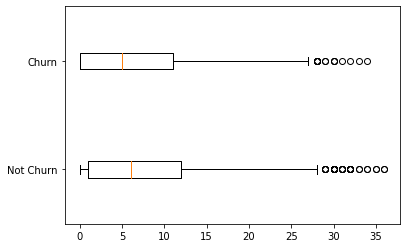

In [14]:
churn_possibilities = customer_df.Churn.unique()

# 비어있는 Series 하나 만들기
box_sr = pd.Series('', index=churn_possibilities)

# 비어있는 Series에 값 채우기
for poss in churn_possibilities:
    BM = customer_df.Churn == poss
    box_sr[poss] = customer_df[BM].Call_Failure.values

# 하나의 figure에 두 plot 그리기
plt.boxplot(box_sr,vert=False) # Vertical False
plt.yticks([1,2],['Not Churn','Churn'])
plt.show()


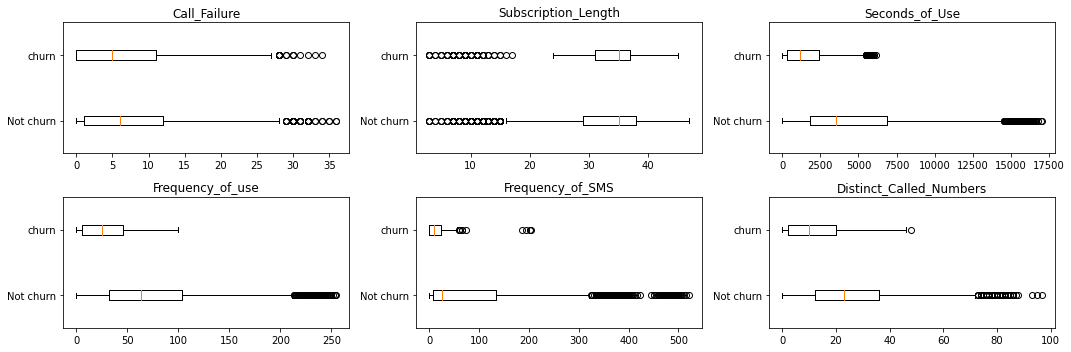

In [17]:
select_columns=['Call_Failure', 'Subscription_Length', 'Seconds_of_Use',
       'Frequency_of_use', 'Frequency_of_SMS', 'Distinct_Called_Numbers',]

churn_possibilities = customer_df.Churn.unique()

plt.figure(figsize=(15,5))


for i,sc in enumerate(select_columns) :
    ### 특정 column에 대해서 churn 1 or 0을 구분하는 Series를 만드는 함수임.
    for poss in churn_possibilities :
        BM = customer_df.Churn == poss
        box_sr[poss] = customer_df[BM][sc].values

    ### plot 그리기
    plt.subplot(2,3,i+1)
    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],['Not churn', 'churn'])
    plt.title(sc)
    
plt.tight_layout()
plt.show()

In [50]:
month_df = pd.read_csv('data/ch10/Electric_Production.csv')
month_df.head(1)

,DATE,IPG2211A2N
0,1/1/1985,72.5052


In [108]:
month_df.columns = ['date','ipg']
month_df.date = pd.to_datetime(month_df.date, format="%m/%d/%Y")

month_df.index= month_df.date

NameError: name 'month_df' is not defined

In [52]:
month_df.drop(columns='date', inplace=True)
month_df

,ipg
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [53]:
predict_df = pd.DataFrame('', index=month_df.iloc[24:,:].index, columns=['ia1','ia2','ia3','da'])
predict_df

,ia1,ia2,ia3,da
date,,,,
1987-01-01,,,,
1987-02-01,,,,
1987-03-01,,,,
1987-04-01,,,,
1987-05-01,,,,
...,...,...,...,...
2017-09-01,,,,
2017-10-01,,,,
2017-11-01,,,,


In [54]:
predict_df['da'] = month_df.ipg

In [55]:
month_df['month'] = list(map(lambda v : v.month, month_df.index))

Apply는 row를 하나씩 불러온다. iterrow와 유사하다.

iterrow는 dataframe에 있는 row를 하나씩 불러오는 용도라면 
<br>
Apply는 row를 하나씩 불러와 함수를 적용시키고 업데이트를 한다.

In [56]:
def computeia1(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.month == row_date.month
    return wdf[BM].ipg.mean()

predict_df.ia1 = predict_df.apply(computeia1,axis=1)

In [58]:
from sklearn.linear_model import LinearRegression

def computeia2(r) :
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[:-1]
    BM = wdf.month == row_date.month ## 월(month)이 같은 index 추출
    wdf = wdf[BM]
    wdf.reset_index(drop=True,inplace=True)
    wdf.drop(columns=['month'], inplace =True)
    wdf['integer'] = range(len(wdf))
    wdf['ones'] = 1
    lm = LinearRegression()
    lm.fit(wdf.drop(columns=['ipg']), wdf.ipg)
    return lm.coef_[0]

predict_df.ia2 = predict_df.apply(computeia2,axis=1)


In [59]:
predict_df.tail()

,ia1,ia2,ia3,da
date,,,,
2017-09-01,86.105297,1.378406,,98.6154
2017-10-01,79.790228,1.185773,,93.6137
2017-11-01,82.692128,1.190510,,97.3359
2017-12-01,95.164994,1.421533,,114.7212
2018-01-01,101.272830,1.537419,,129.4048


In [60]:
def computeia3(r):
    row_date = r.name
    wdf = month_df.loc[:row_date].iloc[-5:-2]
    return wdf.ipg.mean()

predict_df.ia3 = predict_df.apply(computeia3,axis=1)

predict_df

,ia1,ia2,ia3,da
date,,,,
1987-01-01,72.905450,0.800500,59.291467,73.8152
1987-02-01,69.329450,-2.685100,61.669767,70.0620
1987-03-01,62.336150,-0.228100,67.097433,65.6100
1987-04-01,57.252150,-0.438500,70.670867,60.1586
1987-05-01,55.564400,0.498600,69.829067,58.8734
...,...,...,...,...
2017-09-01,86.105297,1.378406,102.129167,98.6154
2017-10-01,79.790228,1.185773,107.746067,93.6137
2017-11-01,82.692128,1.190510,106.566800,97.3359


In [61]:
# x = independent value , y = dependent value
x = predict_df.drop(columns='da')
y = predict_df.da
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [62]:
print('intercept (b0)',lm.intercept_)
coef_names = ['b1','b2','b3']
print(pd.DataFrame({'predictor' : x.columns, 'coefficient Name' : coef_names, 'coeefficient value': lm.coef_}))

intercept (b0) -25.752948794014685
  predictor coefficient Name  coeefficient value
0       ia1               b1            1.295225
1       ia2               b2            1.436991
2       ia3               b3            0.151708


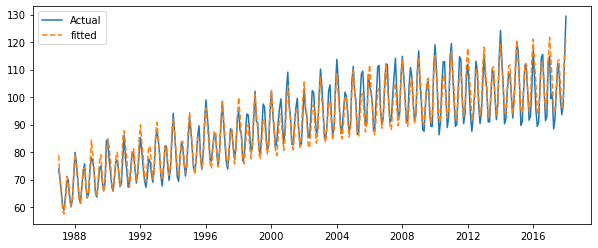

In [67]:
plt.figure(figsize=(10,4))
plt.plot(x.index,y, label='Actual')
plt.plot(x.index,lm.predict(x), label='fitted', linestyle='--')
plt.legend()
plt.show()

### Exercise

1. Restructure과 Reformulate 차이
* Restructure은 분석도구를 활용하기 위해 데이터를 가공하는 과정을 말합니다. 분석에 필요한 데이터를 추출하는 과정을 포함합니다.
* Reformaulate는 데이터셋에서 의미있는 데이터를 추출하는 과정을 말합니다. 필요한 row를 얻기 위해 새로운 열을 만들거나 아예 새로운 테이블을 만드는 과정입니다.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

air_df = pd.read_csv('data/ch10/LaqnData.csv')
for col in air_df.columns :
    print("{} : {}" .format(col, air_df[col].unique()))

Site : ['CT3']
Species : ['NO' 'NO2' 'NOX' 'PM10' 'PM2.5']
ReadingDateTime : ['01/01/2017 00:00' '01/01/2017 01:00' '01/01/2017 02:00' ...
 '31/12/2017 21:00' '31/12/2017 22:00' '31/12/2017 23:00']
Value : [ 3.5  3.6  2.2 ... -7.  -8.  -6. ]
Units : ['ug m-3' 'ug m-3 as NO2' 'ug/m3']
Provisional or Ratified : ['R']


In [101]:
#  Apply로  구현하기 (row가 많을수록 효율적이지 못함.)
def extract_date_time(r) :
    row_date = r.ReadingDateTime
    to_datetime=pd.to_datetime(row_date, format="%d/%m/%Y %H:%M")
    r['date'] = to_datetime.date()
    r['time'] = to_datetime.time()
    return r

air_df = air_df.apply(extract_date_time, axis=1)



In [ ]:
## split 사용해서 구현하기
air_df = pd.read_csv('data/ch10/LaqnData.csv')
a = air_df.ReadingDateTime.str.split(' ', expand=True)
print(type(a[0][0]))

In [119]:
# apply 사용하지 않고 구현하기
air_df = pd.read_csv('data/ch10/LaqnData.csv')

air_df.ReadingDateTime = pd.to_datetime(air_df.ReadingDateTime, format="%d/%m/%Y %H:%M")
air_df['date'] = [a.date() for a in air_df.ReadingDateTime]
air_df['time'] = [a.time() for a in air_df.ReadingDateTime]

air_df.drop(columns=['Site','ReadingDateTime','Provisional or Ratified'], inplace=True)

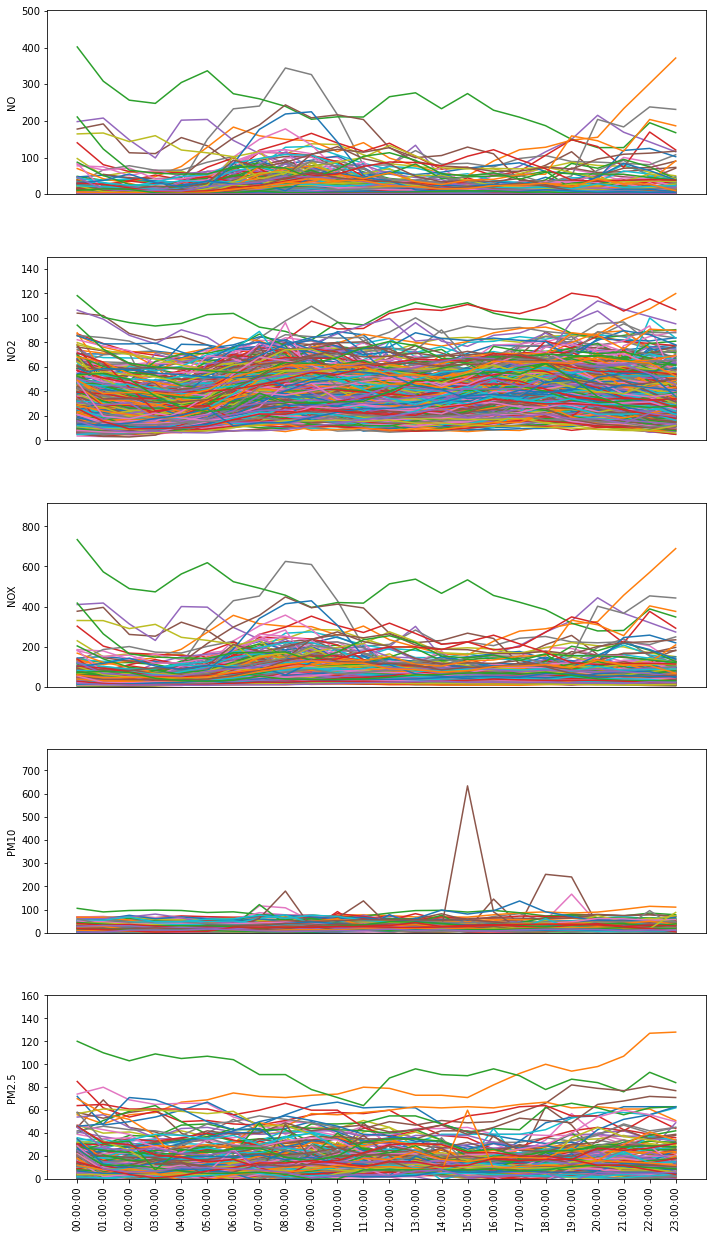

In [33]:
# 그러려면 Species를 하나씩 불러와서 그려야한다.
# 매일 하루를 불러와서 plot을 하나하나 누적시키자.
plt.figure(figsize=(10,20))
for num,spec in enumerate(air_df.Species.unique()) : 
    BM = air_df.Species == spec
    a = air_df[BM]
    plt.subplot(6,1,num+1)
    for i in a.date.unique() :
        BM = a.date == i
        b = a[BM]
        plt.plot(b['time'].astype(str), b['Value'])
    plt.ylabel(spec) # y축에 label 붙이기
    plt.ylim(0,1.25*int(a['Value'].max())) # y축 크기 정하기
    plt.xticks([]) # xticks 숨기기

plt.xticks(a.time.unique().astype(str), rotation=90)
plt.tight_layout()
plt.show()
    

    

### Exercise 2
* Series에서 .str를 쓰면 개별 항목에 대해서 split 또는 replace를 사용할 수 있음. 

In [81]:
stock_df = pd.read_csv('./data/ch10/stock_index.csv')

a = stock_df['t'].str.split(' ', expand=True) 
b = a[1].str.split('-',expand=True)

stock_df['day'] = a[0]
stock_df['time'] = b[0]
stock_df['what'] = b[1]

stock_df.drop(columns='t', inplace = True)

In [ ]:
a = stock_df.columns.to_list()
new = a[-3:]
old = a[:-3]
new_col = new+old
stock_df = stock_df[new_col]

### day와 time datetime으로 바꾸기
stock_df.day=pd.to_datetime(stock_df.day)
stock_df.time=pd.to_datetime(stock_df.time)

### year lambda로 불러오기
stock_df['year'] = list(map(lambda x : x.year, stock_df.day))

In [91]:
### 2020년 함수만 가지고 오기
BM = stock_df.year == 2020
stock_2020 = stock_df[BM]

stock_2020.reset_index(drop=True, inplace=True)